In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
## Delete the rows or data points to handle the missing values

df.shape

(891, 15)

In [7]:
df.dropna().shape #Not a good idea

(182, 15)

In [8]:
## dolumn wise deletion

df.dropna(axis = 1).shape

(891, 11)

### Imputation missing values
### 1 - Mean value imputation - Mean imputation works well when we have normally distributed data

/tmp/ipykernel_1230/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

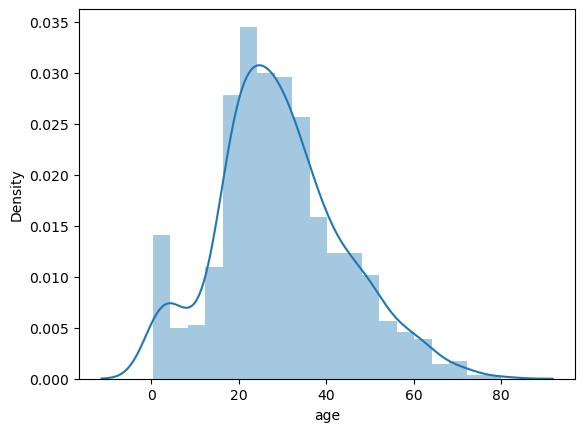

In [9]:
sns.distplot(df['age'])

In [10]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [11]:
df[['age', 'Age_mean']]

,age,Age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


### 2 - Median value imputation - if we have outliers in the dataset

In [12]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [13]:
df[['age', 'Age_median', 'Age_mean']]

,age,Age_median,Age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,NaN,28.0,29.699118
889,26.0,26.0,26.000000


### 3 - Mode value imputation - categorical values

In [14]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [17]:
df['embarked_mdoe'] = df['embarked'].fillna(mode_value)

In [18]:
df[['embarked', 'embarked_mdoe']]

,embarked,embarked_mdoe
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Handling Imbalanced dataset
1. Up Sampling
2. Down Sampling

In [19]:
import numpy as np
import pandas as pd

# set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(class_0_ratio * n_samples)
n_class_1 = n_samples-n_class_0

In [20]:
n_class_0, n_class_1

(900, 100)

In [21]:
## Create the dataframe with imbalanced dataset
class_0 = pd.DataFrame({
'feature_1': np.random.normal(loc = 0, scale = 1, size = n_class_0),
'feature_2': np.random.normal(loc = 0, scale = 1, size = n_class_0),
'target': [0] * n_class_0})

class_1 = pd.DataFrame({
'feature_1': np.random.normal(loc = 2, scale = 1, size = n_class_1),
'feature_2': np.random.normal(loc = 2, scale = 1, size = n_class_1),
'target': [1] * n_class_1})

In [22]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [23]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [24]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [25]:
## Upsampling

df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [26]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples = len(df_majority), random_state = 42)

In [27]:
df_minority_upsampled.shape

(900, 3)

In [28]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [29]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [30]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [31]:
import numpy as np
import pandas as pd

# set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(class_0_ratio * n_samples)
n_class_1 = n_samples-n_class_0

## Create the dataframe with imbalanced dataset
class_0 = pd.DataFrame({
'feature_1': np.random.normal(loc = 0, scale = 1, size = n_class_0),
'feature_2': np.random.normal(loc = 0, scale = 1, size = n_class_0),
'target': [0] * n_class_0})

class_1 = pd.DataFrame({
'feature_1': np.random.normal(loc = 2, scale = 1, size = n_class_1),
'feature_2': np.random.normal(loc = 2, scale = 1, size = n_class_1),
'target': [1] * n_class_1})

In [32]:
## Downsampling

df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [33]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state = 42)

In [34]:
df_majority_downsampled.shape

(100, 3)

In [35]:
df_majority_downsampled.head()

,feature_1,feature_2,target
70,0.468439,1.720920,0
827,1.089165,-0.464899,0
231,0.753869,-0.969798,0
588,0.588686,-0.704720,0
39,0.283627,1.012868,0


In [36]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [37]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

## SMOTE (Synthetic Minority over-sampling technique)

In [38]:
from sklearn.datasets import make_classification

In [39]:
X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.9], random_state=12)

In [40]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [41]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [42]:
import matplotlib.pyplot as plt

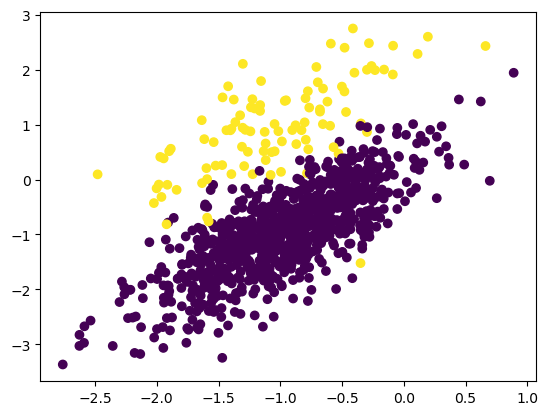

In [43]:
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [44]:
!pip install imblearn

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
## transform the dataset

oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [47]:
X.shape

(1800, 2)

In [48]:
y.shape

(1800,)

In [49]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.075036,0.514962,1
1796,-1.163673,1.268612,1
1797,-1.933183,-0.172332,1
1798,-1.920013,-0.094223,1


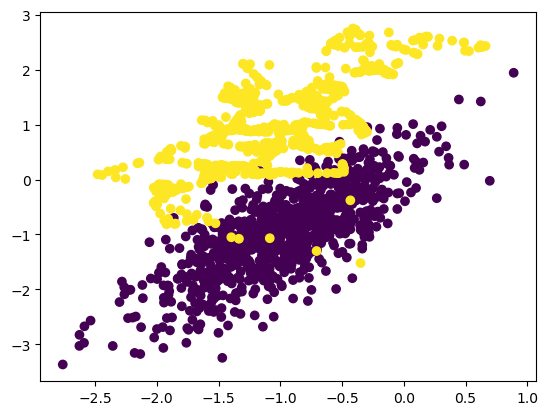

In [50]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

## Data Interpolation

## 1. Linear Interpolation

In [51]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

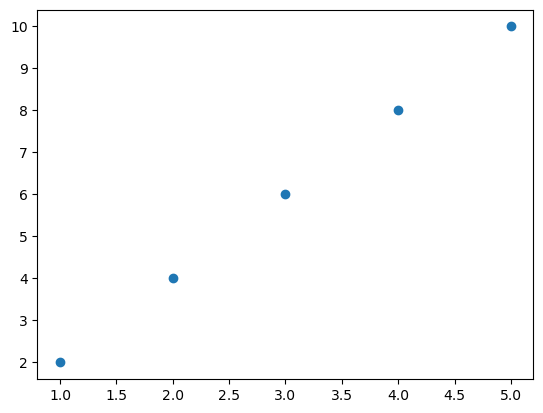

In [52]:
plt.scatter(x, y)

In [53]:
## interpolate the data using linera interpolation
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.interp(x_new, x, y)

In [54]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

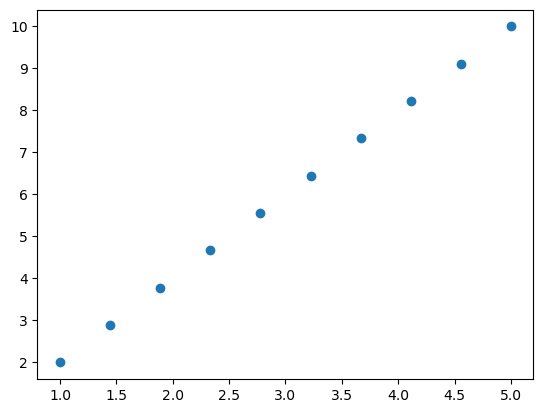

In [55]:
plt.scatter(x_new, y_interp)

## 2. Cubic Interpolation with Scipy

In [56]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 8, 27, 64, 125])

In [57]:
from scipy.interpolate import interp1d

In [58]:
## Create a cubic interpolation function
f = interp1d(x, y, kind = 'cubic')

In [59]:
## Interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp = f(x_new)

In [60]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

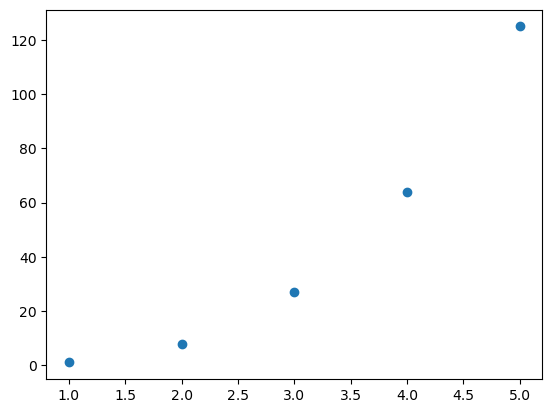

In [61]:
plt.scatter(x, y)

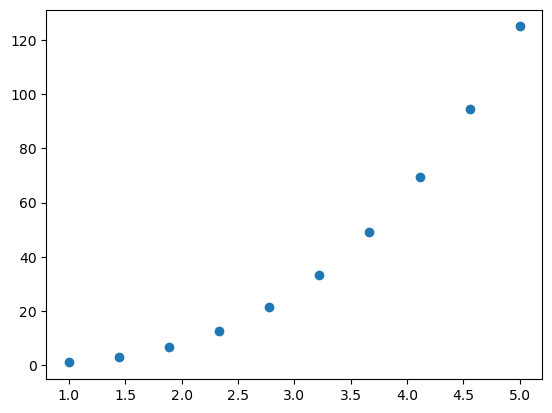

In [62]:
plt.scatter(x_new, y_interp)

## 3. Polynomial Interpolation 

In [63]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [64]:
## interpolate the data using polynomial interpolation
p = np.polyfit(x, y, 2)

In [65]:
## Interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp = np.polyval(p, x_new)

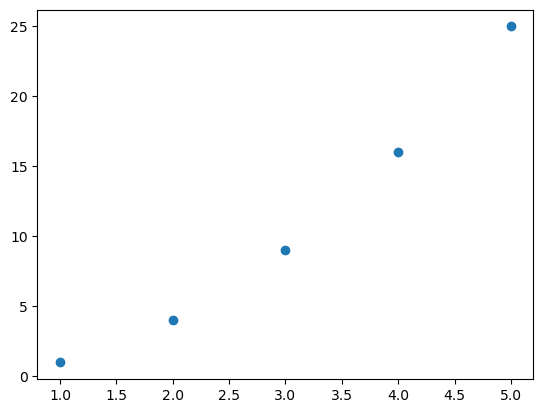

In [66]:
plt.scatter(x, y)

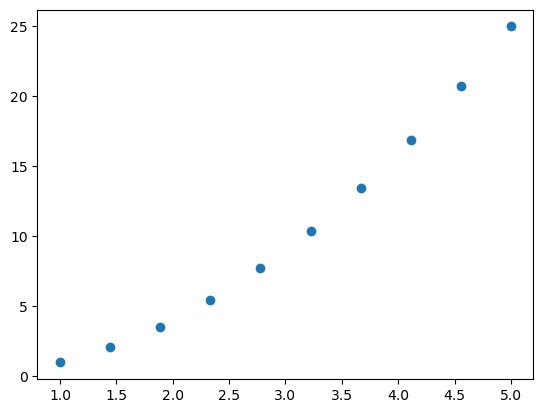

In [67]:
plt.scatter(x_new, y_interp)

## 5 Number summary and Box Plot

## Maximum, Minimum, Median, Q1, Q3, IQR

In [1]:
import numpy as np

In [2]:
list_marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]
minimum, Q1, median, Q3, maximum = np.quantile(list_marks, [0, 0.25, 0.50, 0.75, 1.0])

In [4]:
minimum, Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [5]:
IQR = Q3 - Q1
IQR

35.0

In [6]:
lower_fence = Q1 - 1.5*IQR
lower_fence

1.5

In [7]:
higher_fence = Q3 + 1.5*IQR
higher_fence

141.5

In [8]:
import seaborn as sns

<AxesSubplot: >

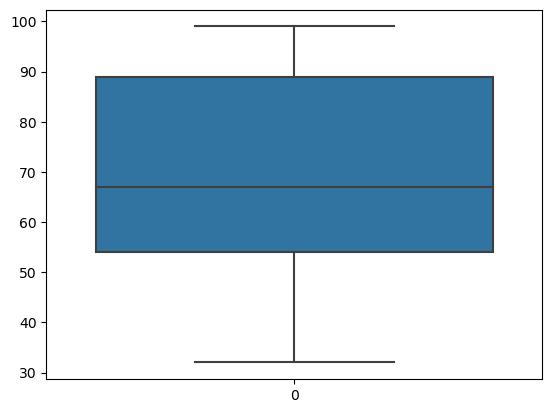

In [9]:
sns.boxplot(list_marks)

In [14]:
list_marks = [-80, -50, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 150, 160, 200]

<AxesSubplot: >

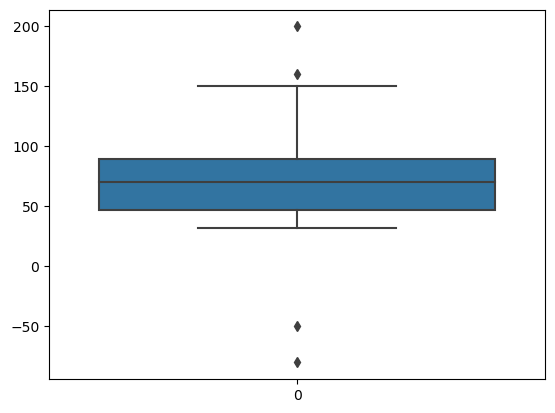

In [15]:
sns.boxplot(list_marks)